In [93]:
#Dependencies
import pandas as pd
from pathlib import Path
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [94]:
#Use Panda to read Data
crash_data = pd.read_csv("Resources/Crash_Data.csv")
crash_data.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


---

# Exploratory Data Analysis 

---

In [95]:
# getting the dimensions of the data set (number of rows and columns)
crash_data.shape

(48882, 35)

In [96]:
# checking the number of null values in each column
crash_data.isna().sum()

X                       139
Y                       139
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet             304
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 45
Gender_Drv1             885
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          45
AlcoholUse_Drv1          45
DrugUse_Drv1             45
Unittype_Two           3203
Age_Drv2               4507
Gender_Drv2            4604
Traveldirection_Two    3203
Unitaction_Two         3203
Violation1_Drv2        4507
AlcoholUse_Drv2        4507
DrugUse_Drv2           4507
Latitude                139
Longitude               139
dtype: int64

### ----

In [97]:
#filter Data to specific years (2019 - 2022)
specific_year=crash_data.loc[(crash_data["Year"]==2019) | (crash_data["Year"]==2020) |
                             (crash_data["Year"]==2021) | (crash_data["Year"]==2022)]
specific_year

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32271,-111.919900,33.360130,32272,3605175,2019/01/01 07:26:00+00,2019,Lakeshore Dr,Bell De Mar Dr,400.0,Not Junction Related,1.0,0.0,Suspected Serious Injury,Rear End,Dark Lighted,Clear,Dry,Driver,28.0,Male,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driverless,NaN,NaN,North,Properly Parked,NaN,NaN,NaN,33.360130,-111.919900
32272,-111.891090,33.418430,32273,3524937,2019/01/01 08:17:00+00,2019,Victory Dr,Price Rd,-150.0,Not Junction Related,0.0,0.0,No Injury,Head On,Dark Unknown Lighting,Cloudy,Wet,Driver,54.0,Female,East,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,118.0,Unknown,East,Properly Parked,No Improper Action,No Apparent Influence,No Apparent Influence,33.418430,-111.891090
32273,-111.892010,33.407360,32274,3502322,2019/01/01 09:40:00+00,2019,Price Rd,Broadway Rd,-50.0,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Unknown Lighting,Clear,Dry,Driver,118.0,Unknown,South,Unknown,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.407360,-111.892010
32274,-111.940150,33.407390,32275,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,Driver,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407390,-111.940150
32275,-111.967380,33.378300,32276,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,Driver,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,Driver,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.378300,-111.967380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46462,-111.933653,33.421967,46463,4016095,2022/12/31 20:35:00+00,2022,University Dr,College Ave,401.0,Not Junction Related,0.0,0.0,No Injury,Rear End,Daylight,Cloudy,Dry,Driver,58.0,Male,West,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,22.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653
46463,-111.939610,33.393137,46464,4017552,2022/12/31 21:55:00+00,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,0.0,0.0,No Injury,Other,Daylight,Clear,Dry,Driver,23.0,Male,East,Backing,Other,No Apparent Influence,No Apparent Influence,Driver,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610
46464,-111.961130,33.378244,46465,4014475,2023/01/01 01:02:00+00,2022,Baseline Rd,Darrow Dr,0.0,Intersection 4 Way 202,1.0,0.0,Suspected Minor Injury,Left Turn,Dark Lighted,Cloudy,Dry,Driver,50.0,Female,Northeast,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,Driver,19.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130
46465,-111.965455,33.378270,46466,4014901,2023/01/01 01:45:00+00,2022,Arizona Mills S,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Dry,Driver,121.0,Unknown,South,Making Right Turn,Failed

In [98]:
# checking the number of null values in each column
specific_year.isna().sum()

X                         1
Y                         1
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName                0
CrossStreet             165
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 13
Gender_Drv1             277
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          13
AlcoholUse_Drv1          13
DrugUse_Drv1             13
Unittype_Two           1042
Age_Drv2               1508
Gender_Drv2            1534
Traveldirection_Two    1042
Unitaction_Two         1042
Violation1_Drv2        1508
AlcoholUse_Drv2        1508
DrugUse_Drv2           1508
Latitude                  1
Longitude                 1
dtype: int64

In [99]:
# Checking the datatype of all the features.
specific_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14196 entries, 32271 to 46466
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    14195 non-null  float64
 1   Y                    14195 non-null  float64
 2   OBJECTID             14196 non-null  int64  
 3   Incidentid           14196 non-null  int64  
 4   DateTime             14196 non-null  object 
 5   Year                 14196 non-null  int64  
 6   StreetName           14196 non-null  object 
 7   CrossStreet          14031 non-null  object 
 8   Distance             14195 non-null  float64
 9   JunctionRelation     14195 non-null  object 
 10  Totalinjuries        14195 non-null  float64
 11  Totalfatalities      14195 non-null  float64
 12  Injuryseverity       14195 non-null  object 
 13  Collisionmanner      14195 non-null  object 
 14  Lightcondition       14195 non-null  object 
 15  Weather              14195 non-null  

In [100]:
# checking the statistics of int64 and float64 datatypes such as mean, median
specific_year.describe()

,X,Y,OBJECTID,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,14195.000000,14195.000000,14196.000000,1.419600e+04,14196.000000,14195.00000,14195.000000,14195.000000,14183.000000,12688.000000,14195.000000,14195.000000
mean,-111.933300,33.398878,39369.500000,3.726891e+06,2020.347210,4.58935,0.520113,0.004086,50.780018,39.675757,33.398878,-111.933300
std,0.024238,0.028813,4098.176546,1.780073e+05,1.228968,244.33336,0.854458,0.065965,44.582193,23.087382,0.028813,0.024238
min,-111.979146,33.319863,32272.000000,3.457062e+06,2019.000000,-1964.00000,0.000000,0.000000,8.000000,11.000000,33.319863,-111.979146
25%,-111.952510,33.378270,35820.750000,3.564758e+06,2019.000000,-55.00000,0.000000,0.000000,23.000000,24.000000,33.378270,-111.952510
50%,-111.928610,33.407410,39369.500000,3.692082e+06,2020.000000,0.00000,0.000000,0.000000,33.000000,34.000000,33.407410,-111.928610
75%,-111.911260,33.421947,42918.250000,3.900176e+06,2022.000000,65.00000,1.000000,0.000000,59.000000,50.000000,33.421947,-111.911260
max,-111.877590,33.458490,46467.000000,4.075527e+06,2022.000000,2618.00000,9.000000,2.000000,255.000000,255.000000,33.458490,-111.877590


In [101]:
# checking for the modes for object datatype
specific_year.describe(include="object")

,DateTime,StreetName,CrossStreet,JunctionRelation,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2
count,14196,14196,14031,14195,14195,14195,14195,14195,14195,14195,13919,14195,14195,14183,14183,14183,13154,12662,13154,13154,12688,12688,12688
unique,14079,365,486,18,5,11,7,7,7,4,3,10,23,18,2,2,4,3,10,22,16,2,2
top,2020/03/19 19:57:00+00,Rural Rd,Rural Rd,Intersection Related 206,No Injury,Rear End,Daylight,Clear,Dry,Driver,Male,East,Going Straight Ahead,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,Driver,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence
freq,3,1308,657,4552,9109,4516,9640,12226,13422,13704,7479,3527,6652,3285,13414,14022,12371,7096,3374,6438,11613,12644,12682


Column:  X


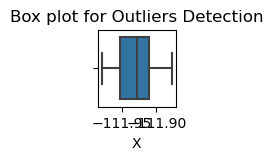

Column:  Y


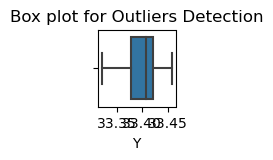

Column:  OBJECTID


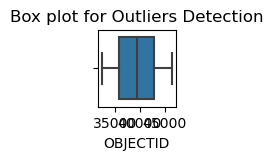

Column:  Incidentid


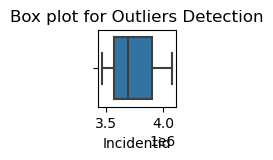

Column:  Year


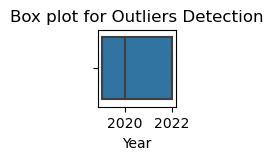

Column:  Distance


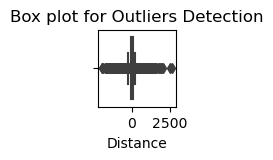

Column:  Totalinjuries


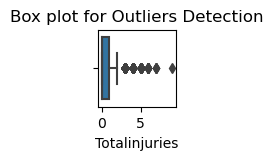

Column:  Totalfatalities


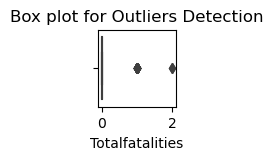

Column:  Age_Drv1


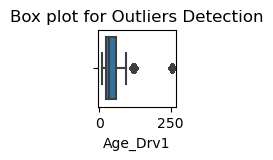

Column:  Age_Drv2


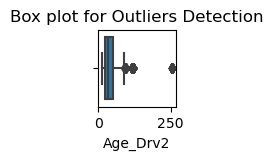

Column:  Latitude


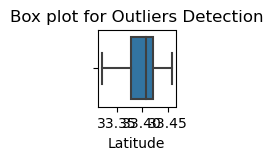

Column:  Longitude


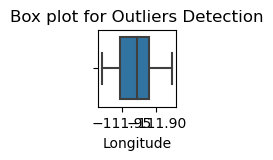

In [102]:
# checking for outliers for columns with data type float64 or int64
import seaborn as sns

#box plot for outliers
for col in specific_year.columns:
    if specific_year[col].dtypes != 'object':
        print("Column: ", col)
        plt.figure(figsize=(1,1))
        sns.boxplot(x = specific_year[col])
        plt.title('Box plot for Outliers Detection')
        plt.show()

# Data Cleaning:

#### Dropping all the unnecessary columns or duplicate columns like X and Y

In [103]:
# drop column X, Y, OBJECTID
# X and Y are duplicate columns of latitude and longitude
# OBJECTID not needed for data analysis
specific_year = specific_year.drop(['X', 'Y', 'OBJECTID'], axis = 1)

In [104]:
# filter data to only include driver to driver crashes
accidents_df = specific_year[specific_year['Unittype_One'] == 'Driver'][specific_year['Unittype_Two'] == 'Driver']

In [105]:
# drop the columns Unittype_One, Unittype_Two (crash type)
accidents_df = accidents_df.drop(['Unittype_One', 'Unittype_Two'], axis = 1)

In [106]:
accidents_df.isna().sum()

Incidentid               0
DateTime                 0
Year                     0
StreetName               0
CrossStreet            148
Distance                 0
JunctionRelation         0
Totalinjuries            0
Totalfatalities          0
Injuryseverity           0
Collisionmanner          0
Lightcondition           0
Weather                  0
SurfaceCondition         0
Age_Drv1                 0
Gender_Drv1            213
Traveldirection_One      0
Unitaction_One           0
Violation1_Drv1          0
AlcoholUse_Drv1          0
DrugUse_Drv1             0
Age_Drv2                 0
Gender_Drv2             22
Traveldirection_Two      0
Unitaction_Two           0
Violation1_Drv2          0
AlcoholUse_Drv2          0
DrugUse_Drv2             0
Latitude                 0
Longitude                0
dtype: int64

In [107]:
from scipy import stats

# Select only numeric columns
numeric_columns = accidents_df.select_dtypes(include=['int64', 'float64']).columns

# Function to detect and treat outliers
def detect_and_treat_outliers(data, column):
    # Calculate z-scores
    z_scores = stats.zscore(data[column])
    
    # Set a threshold for z-scores (e.g., 3)
    threshold = 3
    outliers = (abs(z_scores) > threshold)
    
    # Calculate IQR for the column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers based on IQR
    outliers |= (data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)

    # Drop rows with outliers
    data.drop(data[outliers].index, inplace=True)
    
    
# Iterate through numeric columns and detect/treat outliers
for column in numeric_columns:
    detect_and_treat_outliers(accidents_df, column)

# Now, df contains the DataFrame with outliers treated

In [108]:
# get mean, median, additional details of data set without outliers
accidents_df.describe()

,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,7.590000e+03,7590.000000,7590.000000,7590.000000,7590.0,7590.000000,7590.000000,7590.000000,7590.000000
mean,3.716196e+06,2020.270883,2.214055,0.440843,0.0,35.649144,37.490250,33.398268,-111.933445
std,1.791775e+05,1.235860,84.836270,0.684999,0.0,16.587302,15.580009,0.029298,0.024983
min,3.457062e+06,2019.000000,-218.000000,0.000000,0.0,15.000000,16.000000,33.319863,-111.978419
25%,3.556764e+06,2019.000000,-25.000000,0.000000,0.0,22.000000,24.000000,33.378258,-111.955400
50%,3.667243e+06,2020.000000,0.000000,0.000000,0.0,30.000000,33.000000,33.407400,-111.928600
75%,3.892076e+06,2022.000000,30.000000,1.000000,0.0,47.000000,49.000000,33.421942,-111.911187
max,4.065538e+06,2022.000000,230.000000,2.000000,0.0,95.000000,89.000000,33.458490,-111.878282


In [109]:
# check for amount of nulls in all columns
accidents_df.isna().sum()

Incidentid               0
DateTime                 0
Year                     0
StreetName               0
CrossStreet            117
Distance                 0
JunctionRelation         0
Totalinjuries            0
Totalfatalities          0
Injuryseverity           0
Collisionmanner          0
Lightcondition           0
Weather                  0
SurfaceCondition         0
Age_Drv1                 0
Gender_Drv1              0
Traveldirection_One      0
Unitaction_One           0
Violation1_Drv1          0
AlcoholUse_Drv1          0
DrugUse_Drv1             0
Age_Drv2                 0
Gender_Drv2              0
Traveldirection_Two      0
Unitaction_Two           0
Violation1_Drv2          0
AlcoholUse_Drv2          0
DrugUse_Drv2             0
Latitude                 0
Longitude                0
dtype: int64

In [110]:
# get dimensions of the dataframe (number of rows and columns)
accidents_df.shape

(7590, 30)

In [111]:
# getting the count of each unique 'CrossStreet'
accidents_df['CrossStreet'].value_counts()

CrossStreet
McClintock Dr            292
Rural Rd                 289
Price Rd                 283
Broadway Rd              269
University Dr            264
                        ... 
I-10 Exit 153 C1-Ramp      1
Price Rd Non-Cardinal      1
Stadem Dr                  1
W Cottage Ln               1
SR-202 Exit 7 J-Ramp       1
Name: count, Length: 396, dtype: int64

In [112]:
#Imputing Unknown value for Crossstreet:
accidents_df['CrossStreet'].fillna('Unknown', inplace=True)

In [113]:
# check for amount of nulls in all columns 
accidents_df.isna().sum()

Incidentid             0
DateTime               0
Year                   0
StreetName             0
CrossStreet            0
Distance               0
JunctionRelation       0
Totalinjuries          0
Totalfatalities        0
Injuryseverity         0
Collisionmanner        0
Lightcondition         0
Weather                0
SurfaceCondition       0
Age_Drv1               0
Gender_Drv1            0
Traveldirection_One    0
Unitaction_One         0
Violation1_Drv1        0
AlcoholUse_Drv1        0
DrugUse_Drv1           0
Age_Drv2               0
Gender_Drv2            0
Traveldirection_Two    0
Unitaction_Two         0
Violation1_Drv2        0
AlcoholUse_Drv2        0
DrugUse_Drv2           0
Latitude               0
Longitude              0
dtype: int64

# Data Preparation:

In [114]:
accidents_df.head()

,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32274,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015
32275,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738
32276,3478968,2019/01/02 01:14:00+00,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42203,-111.92566
32277,3470739,2019/01/02 02:22:00+00,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.37842,-111.90926
32282,3470724,2019/01/02 18:54:00+00,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.37846,-111.89371


In [115]:
# Separating Data & Time columns 
accidents_df['DateTime'] = pd.to_datetime(accidents_df['DateTime'])

# Create new columns for data and time
accidents_df['Date'] = accidents_df['DateTime'].dt.date
accidents_df['Time'] = accidents_df['DateTime'].dt.time

In [116]:
# drop the column DateTime
accidents_df = accidents_df.drop(['DateTime'], axis = 1)

In [117]:
accidents_df.head()

,Incidentid,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude,Date,Time
32274,3462432,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015,2019-01-01,12:24:00
32275,3470825,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738,2019-01-01,18:39:00
32276,3478968,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42203,-111.92566,2019-01-02,01:14:00
32277,3470739,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.37842,-111.90926,2019-01-02,02:22:00
32282,3470724,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.37846,-111.89371,2019-01-02,18:54:00


In [118]:
# Grouping data by 'Time' and counting accidents
accident_counts = accidents_df.groupby('Time').size().reset_index(name='AccidentCount')
accident_counts

,Time,AccidentCount
0,00:00:00,8
1,00:01:00,9
2,00:02:00,14
3,00:03:00,12
4,00:04:00,13
...,...,...
1274,23:55:00,11
1275,23:56:00,14
1276,23:57:00,13
1277,23:58:00,10


In [119]:
# copy accident_df to time_df
time_df = accidents_df

# convert time of accident to seconds
time_df['Time_seconds'] = time_df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# define the bins for each of the day (each of the day is converted to seconds of the day)
bins = [0, 3600, 7200, 10800, 14400, 18000, 21600, 25200, 
        28800, 32400, 36000, 39600, 43200, 46800, 50400, 54000, 
        57600, 61200, 64800, 68400, 72000, 75600, 79200, 82800, 86400]

# add custom labels for each hour interval
labels = ['00:00:00-00:59:59', '01:00:00-01:59:59', '02:00:00-02:59:59', '03:00:00-03:59:59', '04:00:00-04:59:59', '05:00:00-05:59:59', '06:00:00-06:59:59', '07:00:00-07:59:59',
         '08:00:00-08:59:59', '09:00:00-09:59:59', '10:00:00-10:59:59', '11:00:00-11:59:59', '12:00:00-12:59:59', '13:00:00-13:59:59', '14:00:00-14:59:59', '15:00:00-15:59:59',
         '16:00:00-16:59:59', '17:00:00-17:59:59', '18:00:00-18:59:59', '19:00:00-19:59:59', '20:00:00-20:59:59', '21:00:00-21:59:59', '22:00:00-22:59:59', '23:00:00-23:59:59']

# add the bins to the time_df dataframe
time_df['Time Bin'] = pd.cut(time_df['Time_seconds'], bins=bins, labels=labels)

# filter dataframes based on year
year_2019_df = time_df.loc[(time_df["Year"] == 2019)]
year_2020_df = time_df.loc[(time_df["Year"] == 2020)]
year_2021_df = time_df.loc[(time_df["Year"] == 2021)]
year_2022_df = time_df.loc[(time_df["Year"] == 2022)]

In [120]:
# get the count of accidents for each date and time interval (hourly)
grouped_by_hour = time_df.groupby(['Time Bin', 'Date']).size()
grouped_by_hour
# get the average amount of accidents for each time interval (hourly)
mean_counts = grouped_by_hour.groupby(['Time Bin']).mean()
mean_counts

Time Bin
00:00:00-00:59:59    0.479046
01:00:00-01:59:59    0.392341
02:00:00-02:59:59    0.270954
03:00:00-03:59:59    0.194364
04:00:00-04:59:59    0.163295
05:00:00-05:59:59    0.143064
06:00:00-06:59:59    0.092486
07:00:00-07:59:59    0.059971
08:00:00-08:59:59    0.039740
09:00:00-09:59:59    0.040462
10:00:00-10:59:59    0.018786
11:00:00-11:59:59    0.038295
12:00:00-12:59:59    0.070809
13:00:00-13:59:59    0.136561
14:00:00-14:59:59    0.281792
15:00:00-15:59:59    0.278902
16:00:00-16:59:59    0.210983
17:00:00-17:59:59    0.248555
18:00:00-18:59:59    0.294075
19:00:00-19:59:59    0.359104
20:00:00-20:59:59    0.355491
21:00:00-21:59:59    0.373555
22:00:00-22:59:59    0.456647
23:00:00-23:59:59    0.479046
dtype: float64

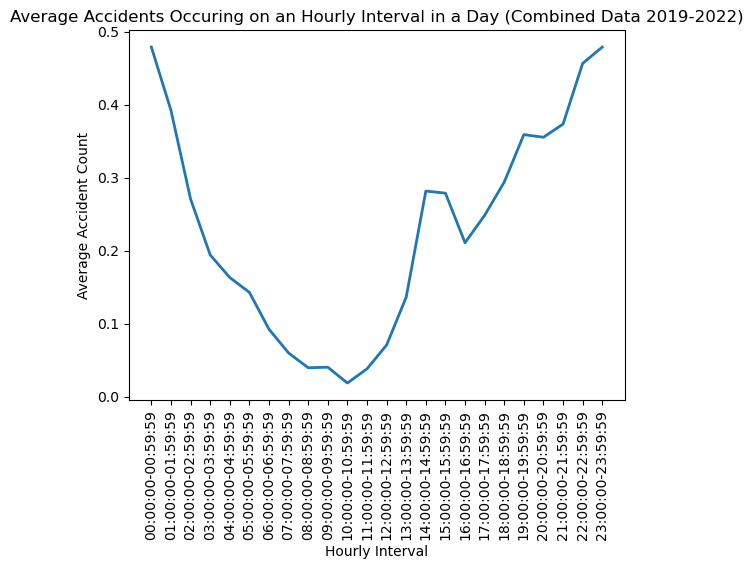

In [121]:
# Generate a line plot of average count of accident vs. hourly interval of the day for (2019-2022)
x = labels 
y = mean_counts
plt.plot(x, y, linewidth=2, markersize= 10, label='2019')
plt.title("Average Accidents Occuring on an Hourly Interval in a Day (Combined Data 2019-2022)")
plt.ylabel("Average Accident Count")
plt.xlabel("Hourly Interval")
plt.xticks(rotation = 90)
plt.show()

In [122]:
# daily average accidents based on hourly interval for year 2019
grouped_by_hour_2019 = year_2019_df.groupby(['Time Bin', 'Date']).size()
grouped_by_hour_2019
mean_counts_2019 = grouped_by_hour_2019.groupby(['Time Bin']).mean()
mean_counts_2019

Time Bin
00:00:00-00:59:59    0.832877
01:00:00-01:59:59    0.709589
02:00:00-02:59:59    0.389041
03:00:00-03:59:59    0.276712
04:00:00-04:59:59    0.213699
05:00:00-05:59:59    0.186301
06:00:00-06:59:59    0.115068
07:00:00-07:59:59    0.068493
08:00:00-08:59:59    0.041096
09:00:00-09:59:59    0.049315
10:00:00-10:59:59    0.016438
11:00:00-11:59:59    0.049315
12:00:00-12:59:59    0.082192
13:00:00-13:59:59    0.194521
14:00:00-14:59:59    0.578082
15:00:00-15:59:59    0.471233
16:00:00-16:59:59    0.315068
17:00:00-17:59:59    0.334247
18:00:00-18:59:59    0.413699
19:00:00-19:59:59    0.556164
20:00:00-20:59:59    0.556164
21:00:00-21:59:59    0.569863
22:00:00-22:59:59    0.739726
23:00:00-23:59:59    0.780822
dtype: float64

In [123]:
# daily average accidents based on hourly interval for year 2020
grouped_by_hour_2020 = year_2020_df.groupby(['Time Bin', 'Date']).size()
grouped_by_hour_2020
mean_counts_2020 = grouped_by_hour_2020.groupby(['Time Bin']).mean()
mean_counts_2020

Time Bin
00:00:00-00:59:59    0.331190
01:00:00-01:59:59    0.266881
02:00:00-02:59:59    0.202572
03:00:00-03:59:59    0.131833
04:00:00-04:59:59    0.102894
05:00:00-05:59:59    0.077170
06:00:00-06:59:59    0.054662
07:00:00-07:59:59    0.032154
08:00:00-08:59:59    0.035370
09:00:00-09:59:59    0.022508
10:00:00-10:59:59    0.012862
11:00:00-11:59:59    0.022508
12:00:00-12:59:59    0.080386
13:00:00-13:59:59    0.125402
14:00:00-14:59:59    0.151125
15:00:00-15:59:59    0.192926
16:00:00-16:59:59    0.170418
17:00:00-17:59:59    0.176849
18:00:00-18:59:59    0.270096
19:00:00-19:59:59    0.279743
20:00:00-20:59:59    0.289389
21:00:00-21:59:59    0.247588
22:00:00-22:59:59    0.308682
23:00:00-23:59:59    0.337621
dtype: float64

In [124]:
# daily average accidents based on hourly interval for year 2021
grouped_by_hour_2021 = year_2021_df.groupby(['Time Bin', 'Date']).size()
grouped_by_hour_2021
mean_counts_2021 = grouped_by_hour_2021.groupby(['Time Bin']).mean()
mean_counts_2021

Time Bin
00:00:00-00:59:59    0.294286
01:00:00-01:59:59    0.231429
02:00:00-02:59:59    0.202857
03:00:00-03:59:59    0.205714
04:00:00-04:59:59    0.140000
05:00:00-05:59:59    0.162857
06:00:00-06:59:59    0.082857
07:00:00-07:59:59    0.074286
08:00:00-08:59:59    0.022857
09:00:00-09:59:59    0.040000
10:00:00-10:59:59    0.017143
11:00:00-11:59:59    0.025714
12:00:00-12:59:59    0.031429
13:00:00-13:59:59    0.077143
14:00:00-14:59:59    0.120000
15:00:00-15:59:59    0.154286
16:00:00-16:59:59    0.120000
17:00:00-17:59:59    0.177143
18:00:00-18:59:59    0.208571
19:00:00-19:59:59    0.237143
20:00:00-20:59:59    0.217143
21:00:00-21:59:59    0.280000
22:00:00-22:59:59    0.291429
23:00:00-23:59:59    0.360000
dtype: float64

In [125]:
# daily average accidents based on hourly interval for year 2022
grouped_by_hour_2022 = year_2022_df.groupby(['Time Bin', 'Date']).size()
grouped_by_hour_2022
mean_counts_2022 = grouped_by_hour_2022.groupby(['Time Bin']).mean()
mean_counts_2022

Time Bin
00:00:00-00:59:59    0.425000
01:00:00-01:59:59    0.333333
02:00:00-02:59:59    0.275000
03:00:00-03:59:59    0.152778
04:00:00-04:59:59    0.186111
05:00:00-05:59:59    0.136111
06:00:00-06:59:59    0.111111
07:00:00-07:59:59    0.061111
08:00:00-08:59:59    0.058333
09:00:00-09:59:59    0.047222
10:00:00-10:59:59    0.027778
11:00:00-11:59:59    0.052778
12:00:00-12:59:59    0.088889
13:00:00-13:59:59    0.144444
14:00:00-14:59:59    0.250000
15:00:00-15:59:59    0.277778
16:00:00-16:59:59    0.227778
17:00:00-17:59:59    0.291667
18:00:00-18:59:59    0.275000
19:00:00-19:59:59    0.344444
20:00:00-20:59:59    0.341667
21:00:00-21:59:59    0.372222
22:00:00-22:59:59    0.455556
23:00:00-23:59:59    0.408333
dtype: float64

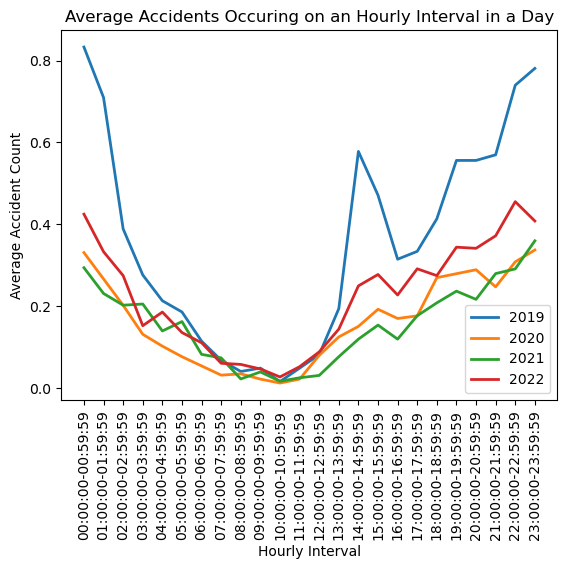

In [126]:
# Generate a line plot of average count of accident vs. hourly interval of the day for each year (2019-2022)
x = labels 
y1 = mean_counts_2019 
y2 = mean_counts_2020
y3 = mean_counts_2021
y4 = mean_counts_2022
plt.plot(x, y1, linewidth=2, markersize= 10, label='2019')
plt.plot(x, y2, linewidth=2, markersize= 10, label='2020')
plt.plot(x, y3, linewidth=2, markersize= 10, label='2021')
plt.plot(x, y4, linewidth=2, markersize= 10, label='2022')
plt.title("Average Accidents Occuring on an Hourly Interval in a Day")
plt.ylabel("Average Accident Count")
plt.xlabel("Hourly Interval")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

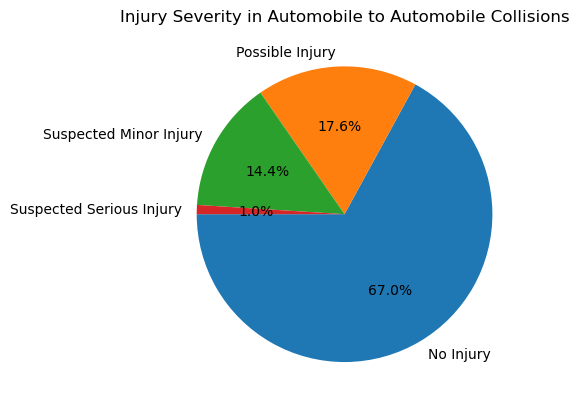

In [127]:
# percentage of injury severity for 2019-2022
injury_severity = accidents_df.groupby(["Incidentid", "Injuryseverity"]).size()
injury_count_severity = injury_severity.groupby("Injuryseverity").count()
injury_count_severity
injury_count_percent = (injury_count_severity / injury_count_severity.sum()) * 100
injury_count_percent.plot.pie(startangle= 180, autopct = "%1.1f%%")
plt.title("Injury Severity in Automobile to Automobile Collisions")
plt.show()